In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set(style = 'darkgrid')

df = pd.read_csv('D:\Crypto\Data\crypto_date.csv')

df.drop(columns='Unnamed: 0',inplace = True)

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df = df.dropna()

<>:9: SyntaxWarning: invalid escape sequence '\C'
<>:9: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Pallav\AppData\Local\Temp\ipykernel_6808\3929707507.py:9: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv('D:\Crypto\Data\crypto_date.csv')


In [2]:
df_alt = df[df['name'] != 'Bitcoin'].copy()
df_alt

,symbol,name,date,price,total_volume,year
1,LTC,Litecoin,2013-04-29,4.38390,0.000000e+00,2013
2,LTC,Litecoin,2013-04-30,4.29649,0.000000e+00,2013
4,LTC,Litecoin,2013-05-01,3.80101,0.000000e+00,2013
6,LTC,Litecoin,2013-05-02,3.37198,0.000000e+00,2013
8,LTC,Litecoin,2013-05-03,3.04491,0.000000e+00,2013
...,...,...,...,...,...,...
60892,BNB,Binance Coin,2025-08-11,822.93600,2.253678e+09,2025
60893,USDT,Tether USDt,2025-08-11,1.00001,1.173150e+11,2025
60894,ETH,Ethereum,2025-08-11,4331.64000,3.721826e+10,2025
60896,HYPE,Hyperliquid,2025-08-11,46.21050,2.744860e+08,2025


In [3]:
alt_mean = df_alt.groupby('name')['price'].mean().reset_index()

In [4]:
alt_mean.sort_values(by = 'price',ascending = False,inplace = True,ignore_index=True)
alt_mean

,name,price
0,Ethereum,1238.402704
1,Bitcoin Cash,331.498606
2,Binance Coin,306.076894
3,Solana,80.053279
4,Litecoin,64.190498
5,Avalanche,33.481214
6,Hyperliquid,27.090783
7,Chainlink,11.067659
8,Toncoin,4.094922
9,UNUS SED LEO,4.004789


In [5]:
p1 = alt_mean.head(10)
p1['price'] = p1['price'].astype('int')

In [6]:
names = p1['name'].values
avg = p1['price'].values

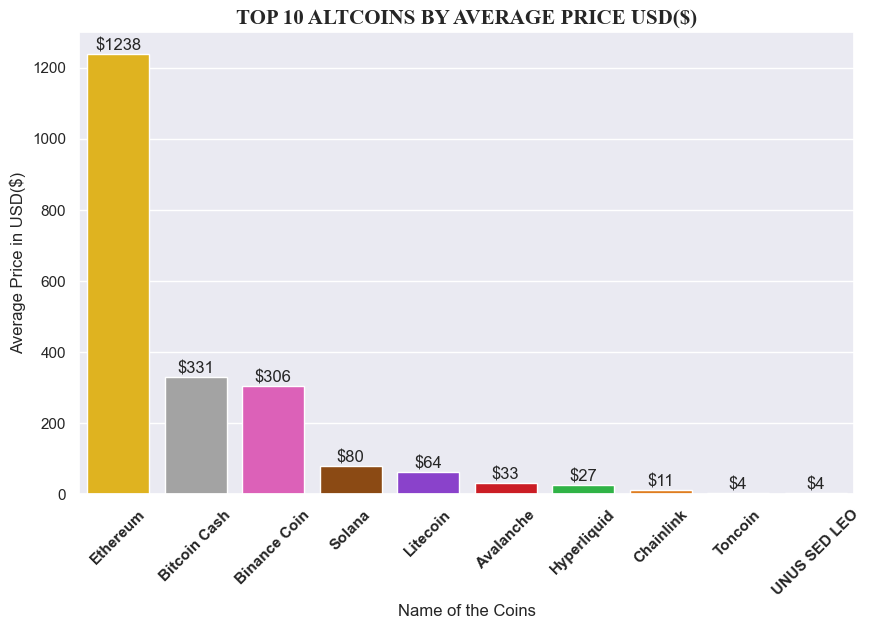

In [7]:
plt.figure(figsize = (10,6))
sns.barplot(data = p1,x = 'name',y = 'price',hue = 'price',palette='bright')
plt.title('TOP 10 ALTCOINS BY AVERAGE PRICE USD($)',fontsize = 15,fontweight = 'bold',fontfamily= 'Times New Roman')
plt.xlabel('Name of the Coins')
plt.ylabel('Average Price in USD($)')
plt.xticks(rotation = 45,ha = 'center',fontweight = 'bold')
plt.legend().set_visible(False)
for i in range(len(p1)):
    plt.text(i,avg[i]+10,f'${avg[i]}',ha = 'center')




In [8]:
df_BTC = df[df['name'] == 'Bitcoin'].copy()

In [9]:
df_BTC['price'].max()                        

np.float64(121785.0)

In [10]:
df_alt = df_alt.groupby('date')['price'].sum()

In [11]:
df_alt = df_alt.reset_index()

In [12]:
df_alt
df_BTC = df_BTC[['date','price']].reset_index()

In [13]:
df_BTC.drop(columns = 'index',inplace = True)

In [14]:
df_merged = pd.merge(df_alt,df_BTC,on = 'date',suffixes=('_alt','_btc'))

In [15]:
btc_mean =df_merged['price_btc'].mean()
alt_mean =df_merged['price_alt'].mean()

In [20]:
p2 = {
    'Bitcoin':btc_mean,
    'All Others':alt_mean
}
df_p2 = pd.DataFrame(list(p2.items()), columns=['name', 'price'])
df_p2['price'] = df_p2['price'].astype('int')

Text(0.5, 1.0, 'AVERAGE PRICE BITCOIN V/S ALTCOINS USD($)')

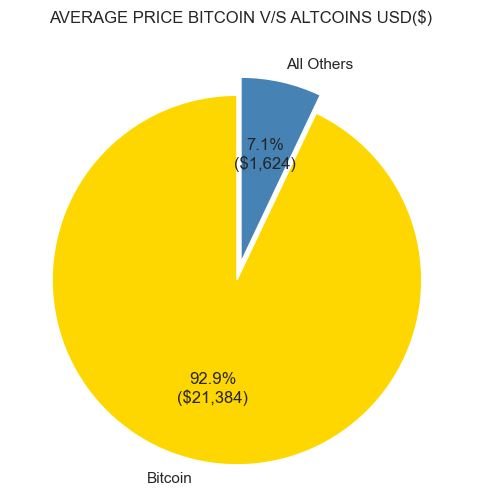

In [35]:
color = ['#FFD700','#4682B4']
plt.figure(figsize = (10,6))
plt.pie(
    df_p2['price'],
    labels = df_p2['name'],
    autopct=lambda pct: f"{pct:.1f}%\n(${(pct/100)*df_p2['price'].sum():,.0f})",
    startangle=90,
    colors = color,
    explode = (0.1,0)
)
plt.title('AVERAGE PRICE BITCOIN V/S ALTCOINS USD($)')
